Problem Statement:

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.
The goal here is to predict the Price of an Old car based on the variables provided in the data set.
Working with Data
Data has been split into two groups and provided in the module:

training set 

test set

The training set is used to build your machine learning model. For the training set, we provide the price of a car (also known as the variable Price) for each participant.

The test set should be used to see how well your model performs on unseen data. For the test set, it is your job to predict price of the car (Price) for each participant.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('Training Data Set.csv')

In [3]:
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


Checking the datatypes of columns in the dataset

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

There are 8 numerical columns and 9 categorical columns

Finding the No of rows and columns in the dataset

In [5]:
train_data.shape

(53515, 17)

There are 53515 rows and 17 columns in the train_data dataset

Checking for any missing values present in the dataset

In [6]:
(train_data.isnull().sum()/train_data.shape[0])*100

Id                      0.000000
Maker                   0.000000
model                   0.000000
Location                0.000000
Distance                2.262917
Owner Type              0.000000
manufacture_year        0.000000
Age of car              0.000000
engine_displacement     0.000000
engine_power            2.688966
body_type              92.271326
Vroom Audit Rating      0.000000
transmission            0.000000
door_count              0.000000
seat_count              0.000000
fuel_type               0.000000
Price                   0.000000
dtype: float64

We can see that the column body_type has about 92.27% of missing values.Therefore we will be dropping that column from the dataset.
Distane and engine_power also have <3% missing values which we will be treating.

In [7]:
train_data.drop('body_type',axis=1,inplace=True)

Checking if there are any outliers in the dataset

In [8]:
num = train_data.select_dtypes('number')

In [9]:
num

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
0,25001,NaN,1964,55,1964,147.0,8,543764.25
1,25002,27750.0,2012,7,1242,51.0,6,401819.25
2,25003,46000.0,2014,5,1995,105.0,7,2392855.50
3,25004,43949.0,2011,8,1618,140.0,7,958606.50
4,25005,59524.0,2012,7,2993,180.0,7,3085561.50
...,...,...,...,...,...,...,...,...
53510,78511,29334.0,2014,5,1598,77.0,4,1342996.50
53511,78512,223631.0,2009,10,1900,77.0,8,510732.75
53512,78513,25500.0,2015,4,1995,105.0,4,2008123.50
53513,78514,1195500.0,2011,8,11950,93.0,5,874352.25


Id


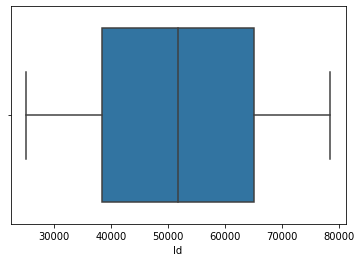

Distance 


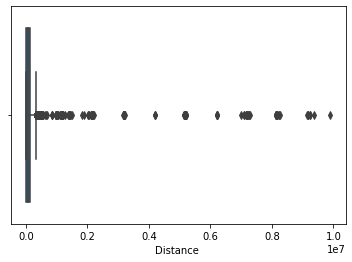

manufacture_year


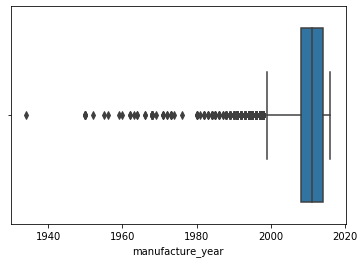

Age of car


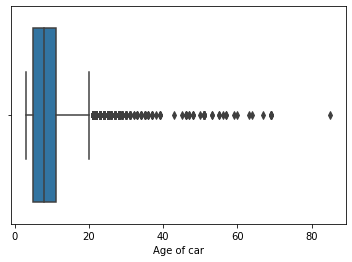

engine_displacement


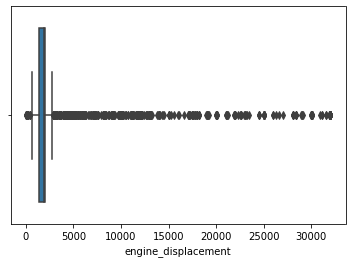

engine_power


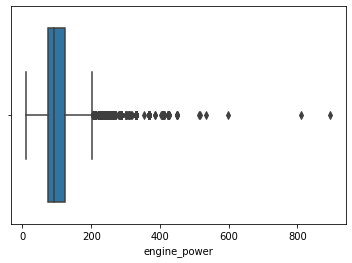

Vroom Audit Rating


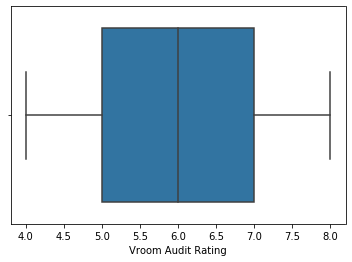

Price


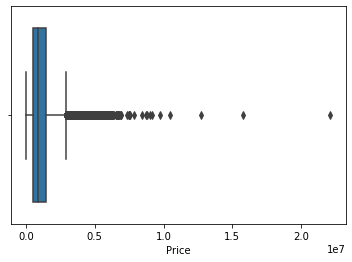

In [10]:
for i in num.columns:
    print(i)
    sns.boxplot(num[i])
    plt.show()

Treating the missing values in the Distance column. We are replacing the Distance with median and not mean as there are outliers in the Distance column. 

In [11]:
train_data['Distance '].fillna(train_data['Distance '].median(),inplace=True)

Treating the missing values in the engine_power column. We are replacing the engine_power with median and not mean as there are outliers in the engine_power column. 

In [12]:
train_data['engine_power'].fillna(train_data['engine_power'].median(),inplace=True)

Checking if there are any missing values after treatment

In [13]:
(train_data.isnull().sum()/train_data.shape[0])*100

Id                     0.0
Maker                  0.0
model                  0.0
Location               0.0
Distance               0.0
Owner Type             0.0
manufacture_year       0.0
Age of car             0.0
engine_displacement    0.0
engine_power           0.0
Vroom Audit Rating     0.0
transmission           0.0
door_count             0.0
seat_count             0.0
fuel_type              0.0
Price                  0.0
dtype: float64

We can see that there are no missing values.

Separating numerical and Categorical columns:

In [14]:
num = train_data.select_dtypes('number')

In [15]:
cat = train_data.select_dtypes('object')

In [16]:
cat

,Maker,model,Location,Owner Type,transmission,door_count,seat_count,fuel_type
0,skoda,octavia,Ahmedabad,Second,man,None,None,petrol
1,fiat,panda,Ahmedabad,Third,man,4,4,petrol
2,bmw,x1,Hyderabad,Third,auto,4,5,diesel
3,nissan,juke,Mumbai,Third,man,4,5,petrol
4,bmw,x5,Jaipur,Fourth & Above,auto,4,5,diesel
...,...,...,...,...,...,...,...,...
53510,skoda,octavia,Delhi,Fourth & Above,man,4,5,diesel
53511,skoda,octavia,Bangalore,Fourth & Above,man,5,5,diesel
53512,bmw,x1,Pune,Third,auto,4,5,diesel
53513,toyota,avensis,Jaipur,Third,man,None,None,diesel


In [17]:
cat['Maker'].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

In [18]:
cat['model'].value_counts().shape

(23,)

In [19]:
cat['Location'].value_counts()

Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

In [20]:
cat['Owner Type'].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

In [21]:
cat['transmission'].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

In [22]:
cat['door_count'].value_counts()

4       33808
5        7630
None     7534
2        4348
3         185
6           8
1           2
Name: door_count, dtype: int64

We can see that there are some door_count values that have None. Replacing these with the mode of door_count.

In [23]:
train_data['door_count'].replace(to_replace=['None'],value=train_data['door_count'].mode(),inplace=True)

In [24]:
train_data['door_count'].value_counts()

4    41342
5     7630
2     4348
3      185
6        8
1        2
Name: door_count, dtype: int64

In [25]:
train_data['seat_count'].value_counts()

5       38824
None     8511
4        4467
7         852
2         725
3         109
6          23
9           2
8           1
1           1
Name: seat_count, dtype: int64

We can see that there are some seat_count values that have None. Replacing these with the mode of seat_count.

In [26]:
train_data['seat_count'].replace(to_replace=['None'],value=train_data['seat_count'].mode(),inplace=True)

In [27]:
train_data['seat_count'].value_counts()

5    47335
4     4467
7      852
2      725
3      109
6       23
9        2
8        1
1        1
Name: seat_count, dtype: int64

In [28]:
train_data['fuel_type'].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

Checking the relation between price(target column) and other columns

In [29]:
train_data.corr()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000258,0.001935,-0.001935,0.003698,0.002459,0.005602,0.003195
Distance,-0.000258,1.000000,-0.217804,0.217804,0.091652,0.009684,-0.006235,-0.155366
manufacture_year,0.001935,-0.217804,1.000000,-1.000000,-0.090401,0.048981,0.003985,0.506707
Age of car,-0.001935,0.217804,-1.000000,1.000000,0.090401,-0.048981,-0.003985,-0.506707
engine_displacement,0.003698,0.091652,-0.090401,0.090401,1.000000,0.312616,-0.005828,0.162072
engine_power,0.002459,0.009684,0.048981,-0.048981,0.312616,1.000000,-0.001641,0.620668
Vroom Audit Rating,0.005602,-0.006235,0.003985,-0.003985,-0.005828,-0.001641,1.000000,0.005109
Price,0.003195,-0.155366,0.506707,-0.506707,0.162072,0.620668,0.005109,1.000000


We can see that manufacture_year and engine_power are positively correlated with price, Age of car is negatively coorelated with price. Also manufacture_year and Age of car are highly negatively correlated with each other

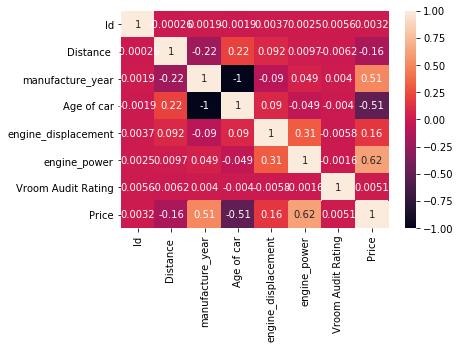

In [30]:
sns.heatmap(train_data.corr(),annot=True)

We are dropping the manufacture_year column as it is correlated to Age of Car to remove multicollinearity effect

In [31]:
train_data.drop('manufacture_year',axis=1,inplace=True)

In [32]:
train_data.corr()

,Id,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
Id,1.000000,-0.000258,-0.001935,0.003698,0.002459,0.005602,0.003195
Distance,-0.000258,1.000000,0.217804,0.091652,0.009684,-0.006235,-0.155366
Age of car,-0.001935,0.217804,1.000000,0.090401,-0.048981,-0.003985,-0.506707
engine_displacement,0.003698,0.091652,0.090401,1.000000,0.312616,-0.005828,0.162072
engine_power,0.002459,0.009684,-0.048981,0.312616,1.000000,-0.001641,0.620668
Vroom Audit Rating,0.005602,-0.006235,-0.003985,-0.005828,-0.001641,1.000000,0.005109
Price,0.003195,-0.155366,-0.506707,0.162072,0.620668,0.005109,1.000000


In [33]:
cat = train_data.select_dtypes('object')

In [34]:
cat

,Maker,model,Location,Owner Type,transmission,door_count,seat_count,fuel_type
0,skoda,octavia,Ahmedabad,Second,man,4,5,petrol
1,fiat,panda,Ahmedabad,Third,man,4,4,petrol
2,bmw,x1,Hyderabad,Third,auto,4,5,diesel
3,nissan,juke,Mumbai,Third,man,4,5,petrol
4,bmw,x5,Jaipur,Fourth & Above,auto,4,5,diesel
...,...,...,...,...,...,...,...,...
53510,skoda,octavia,Delhi,Fourth & Above,man,4,5,diesel
53511,skoda,octavia,Bangalore,Fourth & Above,man,5,5,diesel
53512,bmw,x1,Pune,Third,auto,4,5,diesel
53513,toyota,avensis,Jaipur,Third,man,4,5,diesel


In [35]:
num.drop(['Id','Price','manufacture_year'],axis=1,inplace=True)

/Users/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Scaling the numerical columns of the data using MinMax Scaler

In [36]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
num_scaled = sc.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled,columns=num.columns)

In [37]:
num_scaled

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating
0,0.006618,0.634146,0.060964,0.154628,1.00
1,0.002803,0.048780,0.038392,0.046275,0.50
2,0.004647,0.024390,0.061933,0.107223,0.75
3,0.004439,0.060976,0.050147,0.146727,0.75
4,0.006013,0.048780,0.093134,0.191874,0.75
...,...,...,...,...,...
53510,0.002963,0.024390,0.049522,0.075621,0.00
53511,0.022589,0.085366,0.058963,0.075621,1.00
53512,0.002576,0.012195,0.061933,0.107223,0.00
53513,0.120760,0.060976,0.373163,0.093679,0.25


Repeating the same treatment with the test data

In [38]:
test = pd.read_csv('Test Data Set.csv')

In [39]:
test.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [40]:
test1 = test.drop(['Id','manufacture_year','body_type'],axis=1)

In [41]:
test1.isnull().sum()

Maker                    0
model                    0
Location                 0
Distance               128
Owner Type               0
Age of car               0
engine_displacement      0
engine_power           168
Vroom Audit Rating       0
transmission             0
door_count               0
seat_count               0
fuel_type                0
dtype: int64

In [42]:
test1['Distance '].fillna(test1['Distance '].median(),inplace=True)

In [43]:
test1['engine_power'].fillna(test1['engine_power'].median(),inplace=True)

In [44]:
test1.head()

,Maker,model,Location,Distance,Owner Type,Age of car,engine_displacement,engine_power,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,skoda,octavia,Mumbai,150000.0,First,12,1595,75.0,5,man,4,5,petrol
1,skoda,rapid,Coimbatore,29376.0,Third,5,1598,77.0,4,man,4,5,diesel
2,skoda,octavia,Coimbatore,30563.0,Second,5,1968,110.0,5,man,5,5,diesel
3,audi,q3,Delhi,8650.0,Fourth & Above,4,1968,110.0,8,auto,4,5,diesel
4,audi,tt,Chennai,6400.0,Third,4,1984,169.0,4,auto,2,None,petrol


In [45]:
test1.isnull().sum()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [46]:
test1['door_count'].replace(to_replace=['None'],value=test1['door_count'].mode(),inplace=True)

In [47]:
test1['seat_count'].replace(to_replace=['None'],value=train_data['seat_count'].mode(),inplace=True)

In [48]:
test1['door_count'].value_counts()

4    4389
5     775
2     431
3      19
6       1
Name: door_count, dtype: int64

In [49]:
test1['seat_count'].value_counts()

5    4991
4     455
7      82
2      79
3       8
Name: seat_count, dtype: int64

In [50]:
num_test = test1.select_dtypes('number')

In [51]:
num_test

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating
0,150000.0,12,1595,75.0,5
1,29376.0,5,1598,77.0,4
2,30563.0,5,1968,110.0,5
3,8650.0,4,1968,110.0,8
4,6400.0,4,1984,169.0,4
...,...,...,...,...,...
5610,149976.0,8,1968,103.0,8
5611,332000.0,14,1896,96.0,6
5612,230800.0,14,1896,77.0,7
5613,63480.0,8,1997,104.0,5


In [52]:
num_test1 = sc.transform(num_test)

In [53]:
num_test1

array([[0.01515182, 0.1097561 , 0.04942787, 0.07336343, 0.25      ],
       [0.00296733, 0.02439024, 0.04952167, 0.07562077, 0.        ],
       [0.00308723, 0.02439024, 0.06108923, 0.11286682, 0.25      ],
       ...,
       [0.0233136 , 0.13414634, 0.05883824, 0.07562077, 0.75      ],
       [0.00641225, 0.06097561, 0.06199587, 0.10609481, 0.25      ],
       [0.00757591, 0.06097561, 0.0432064 , 0.07900677, 0.        ]])

In [54]:
num_test = pd.DataFrame(num_test1,columns=num_test.columns)

In [55]:
cat_test = test1.select_dtypes('object')

In [56]:
cat.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission',
       'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

In [57]:
cat_test.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission',
       'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

LabelEncoding the categorical columns present in both test and train dataset

In [58]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in cat.columns:
    cat[i] = label.fit_transform(cat[i])
    cat_test[i] = label.transform(cat_test[i])

/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [59]:
cat_test.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission',
       'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

Combining both numerical and categorical columns to form the treated test and train dataset

In [60]:
test_set = pd.concat([num_test,cat_test],axis=1)

In [61]:
train_set = pd.concat([num_scaled,cat],axis=1)

In [62]:
test_set.head()

,Distance,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Maker,model,Location,Owner Type,transmission,door_count,seat_count,fuel_type
0,0.015152,0.109756,0.049428,0.073363,0.25,6,8,9,0,1,3,4,1
1,0.002967,0.024390,0.049522,0.075621,0.00,6,14,3,3,1,3,4,0
2,0.003087,0.024390,0.061089,0.112867,0.25,6,8,3,2,1,4,4,0
3,0.000874,0.012195,0.061089,0.112867,1.00,0,10,4,1,0,3,4,0
4,0.000646,0.012195,0.061589,0.179458,0.00,0,17,2,3,0,1,4,1


Forming X_train and y_train

In [63]:
X_train = train_set
y_train = train_data['Price']

Fitting a LinearRegression model on Xtrain and ytrain

In [64]:
from sklearn.linear_model import LinearRegression
# Initialize model
lr = LinearRegression()

# Train the model using the df(X and y)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the price of each entry in the test dataset

In [65]:
y_test_pred=lr.predict(test_set)
y_train_pred=lr.predict(X_train)
print('Train R square: ',lr.score(X_train,y_train))

#print('Train R square: ',lr.score(X_test,y_test))
#print('RMSE_train',rmse(y_train_pred,y_train))
# Check trained model y-intercept
print('Intercept',lr.intercept_)

Train R square:  0.6969141263917726
Intercept 1332005.9060526323


In [66]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train_pred,y_train))

464731.14050071134

In [67]:
y_test_pred

array([ 366818.72334177, 1088272.8086408 , 1210605.94144036, ...,
        250842.4797721 , 1189119.96809668,  957865.67386876])

In [68]:
X_test = test_set

In [69]:
X_train.columns

Index(['Distance ', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'Maker', 'model', 'Location', 'Owner Type',
       'transmission', 'door_count', 'seat_count', 'fuel_type'],
      dtype='object')

Since Vroom Audit Rating is least correlated with price. We are dropping it

In [70]:
X_train.drop('Vroom Audit Rating',axis=1,inplace=True)

In [71]:
X_test.drop('Vroom Audit Rating',axis=1,inplace=True)

In [72]:
from sklearn.linear_model import LinearRegression
# Initialize model
lr = LinearRegression()

# Train the model using the df(X and y)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_test_pred=lr.predict(X_test)
y_train_pred=lr.predict(X_train)
print('Train R square: ',lr.score(X_train,y_train))

#print('Train R square: ',lr.score(X_test,y_test))
#print('RMSE_train',rmse(y_train_pred,y_train))
# Check trained model y-intercept
print('Intercept',lr.intercept_)

Train R square:  0.6969081726323803
Intercept 1335000.41988941


In [74]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train_pred,y_train))

464735.70502193394

In order to reduce the RMSE value and impove the model performance we are going to use RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=150)
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(test_set)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
#print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9893504006293312


We can see that the Accuracy improved from 0.6969 to 0.9890

Checking for multicollinearity in the input columns

In [76]:
Xc= X_train

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
vif['Features']=Xc.columns
vif

,VIF Factor,Features
0,1.186058,Distance
1,2.677102,Age of car
2,2.960380,engine_displacement
3,8.133563,engine_power
4,6.548886,Maker
5,4.791392,model
6,3.435701,Location
7,2.750147,Owner Type
8,4.037020,transmission
9,25.987992,door_count


We can see that vif for seat_count is the highest therefore we are dropping that column

In [78]:
X_train1 = X_train.drop(['seat_count'],axis=1)

In [79]:
X_test1 = test_set.drop(['seat_count'],axis=1)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train1.values,i) for i in range(X_train1.shape[1])]
vif['Features']=X_train1.columns
vif

,VIF Factor,Features
0,1.185420,Distance
1,2.636330,Age of car
2,2.941293,engine_displacement
3,6.596473,engine_power
4,6.051291,Maker
5,4.462115,model
6,3.365297,Location
7,2.713501,Owner Type
8,3.912341,transmission
9,15.332117,door_count


In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=150,criterion='mse', max_depth=50)
rf_reg.fit(X_train1, y_train)
y_pred1= rf_reg.predict(X_test1)
print("Accuracy on Traing set: ",rf_reg.score(X_train1,y_train))
#print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9889226471102875


In [82]:
y_train_pred = rf_reg.predict(X_train1)

In [83]:
np.sqrt(mean_squared_error(y_train_pred,y_train))

88845.80415318975

RMSE has reduced to a great extent

Using RandomizedSearchCV to find the best parameters for RandomForestRegressor

In [84]:
from sklearn.model_selection import RandomizedSearchCV

RF_params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800,1000]}

In [89]:
random_search_rf=RandomizedSearchCV(rf_reg,param_distributions=RF_params,n_iter=3,n_jobs=-1,cv=5,verbose=3)

In [90]:
random_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=50,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=150,
                                

In [91]:
random_search_rf.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [92]:
rf = RandomForestRegressor(n_estimators= 800,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [93]:
Output = pd.DataFrame()

In [94]:
Output['Unique Id'] = test['Id']

In [95]:
Output['Price'] = y_pred

In [96]:
Output

,Unique Id,Price
0,11001,3.748997e+05
1,11002,1.003812e+06
2,11003,1.444389e+06
3,11004,2.363069e+06
4,11005,2.970497e+06
...,...,...
5610,16611,7.529266e+05
5611,16612,2.791380e+05
5612,16613,3.815661e+05
5613,16614,1.133248e+06
